In [265]:
import pandas as pd
import numpy as np
from scipy import stats

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [266]:
# astros2016 = pd.read_csv("data/HOU2016.csv")
astros2017 = pd.read_csv("data/HOU2017.csv")
# astros2018 = pd.read_csv("data/HOU2018.csv")
astros2019 = pd.read_csv("data/HOU2019.csv")
yankees2017 = pd.read_csv("data/NYY2017.csv")
dodgers2017 = pd.read_csv("data/LAD2017.csv")
redsox2017 = pd.read_csv("data/BOS2017.csv")


In [267]:
def boolhome(df):
    df.dropna(axis="index", how="all", inplace=True, subset=['Gtm'])
    df.rename(columns={"Unnamed: 3":"Home"}, inplace=True)
    df.replace({"Home":{"@": False, np.nan: True}}, inplace=True)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['GmeSc'] = df['Opp. Starter (GmeSc)'].apply(lambda x: x[-3:-1])
    df['SoAb'] = df['SO'] / df["AB"]
    df['BbAb'] = df['BB'] / df["AB"]
#     df['bbsum'] = df["BB"] + df['SO']
    #df['GmeSc'].apply(lambda x: x.astype(int))
    return df

In [268]:
astros2017df = boolhome(astros2017)
# astros2018df = boolhome(astros2018)
astros2019df = boolhome(astros2019)
# astros2016df = boolhome(astros2016)
yankees2017df = boolhome(yankees2017)
dodgers2017df = boolhome(dodgers2017)
redsox2017df = boolhome(redsox2017)

In [269]:
columns = astros2017df.columns

# GROUPBY home/away

In [275]:
#Home vs. Away groupby for top teams 
astros_home_gb = astros2017df.groupby("Home")
yankees_home_gb = yankees2017df.groupby("Home")
dodgers_home_gb = dodgers2017df.groupby("Home")
redsox_home_gb = redsox2017df.groupby("Home")

In [276]:
#Home vs. Away groupby for Astros 2017 and 2019
astros2017_home_gb = astros2017df.groupby("Home")
astros2019_home_gb = astros2019df.groupby("Home")


* ## OBP advantage

In [277]:
astros_home_obp = astros_home_gb.get_group(True).OBP
astros_away_obp = astros_home_gb.get_group(False).OBP

In [278]:
astros2017_home_obp = astros2017_home_gb.get_group(True).OBP
astros2017_away_obp = astros2017_home_gb.get_group(False).OBP
astros2019_home_obp = astros2019_home_gb.get_group(True).OBP
astros2019_home_obp = astros2019_home_gb.get_group(False).OBP

In [279]:
# yankees_home_obp = yankees_home_gb.get_group(True).OBP
# yankees_away_obp = yankees_home_gb.get_group(False).OBP

In [280]:
# dodgers_home_obp = dodgers_home_gb.get_group(True).OBP
# dodgers_away_obp = dodgers_home_gb.get_group(False).OBP

In [281]:
# redsox_home_obp = redsox_home_gb.get_group(True).OBP
# redsox_away_obp = redsox_home_gb.get_group(False).OBP

In [283]:
# # heights: matt vs nick
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.scatter(astros_home_obp, 
#            np.repeat(0, len(astros_home_obp)) + \
#            np.random.normal(0, 0.1, len(astros_home_obp)), ## jitter
#            s=45)
# ax.scatter(astros_away_obp, 
#            np.repeat(1, len(astros_away_obp)) + \
#            np.random.normal(0, 0.1, len(astros_home_obp)), 
#            s=45)
# ax.set_yticks([0, 1])
# ax.set_yticklabels(["Home", "Away"]);

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the OBP between HOME and AWAY games.

**Alternative:** There is a difference in the OBP between HOME and AWAY games.

In [286]:
# def welch_test_statistic(sample_1, sample_2):
#     numerator = np.mean(sample_1) - np.mean(sample_2)
#     denominator_sq = (np.var(sample_1) / len(sample_1)) + \
#                         (np.var(sample_2) / len(sample_2))
#     return numerator / np.sqrt(denominator_sq)

In [287]:
# test_statistic = welch_test_statistic(astros_home_obp, astros_away_obp)
# print("Welch Test Statistic: {:2.2f}".format(test_statistic))

In [82]:
# def welch_satterhwaithe_df(sample_1, sample_2):
#     ss1 = len(sample_1)
#     ss2 = len(sample_2)
#     df = (
#         ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
#         ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
#     )
#     return df

In [288]:
# df = welch_satterhwaithe_df(astros_home_obp, astros_away_obp)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

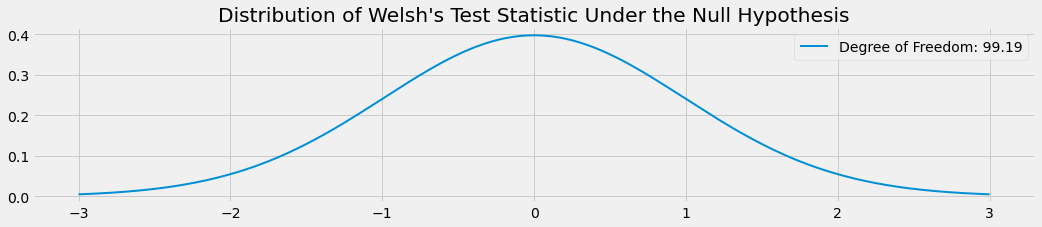

In [84]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

**Also, the above is not always true!**  The $T$ statistic only has a t-distribution **under the assumption that the population distributions are Normal**!  

# is this why my plots look weighted towards one side? is my sample normally distributed? Is OBP NOT normally distributed because it's a rolling average?

If the population is very non-normal, the properties of the t-test **will fail**.  You must have some legitimate a-priori reason to believe the populations are approximately normal to use a t-test!


#### Set Significance level

Given the the love I have for my childhood baseball tea (and in a sense my childhood) that's at stake here, and how much they value to friendship, I decide to be reasonably skeptical, so take $\alpha = 0.05$.

#### Calculate p-value


In [289]:
# # p-val
# x = np.linspace(-3, 3, num=250)

# fig, ax = plt.subplots(1, figsize=(16, 3))
# students = stats.t(df)
# ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
# _ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
# _ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
# ax.legend()
# ax.set_title("p-value Reigon");

In [290]:
# p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
# print("p-value for different average kickflip height: {:2.2f}".format(p_value))

# 0.01 < 0.05 --> there is a statistical difference between HOME and AWAY games.

In [245]:
# test_statistic = welch_test_statistic(astros_home_obp, astros_away_obp)

# p_value = 1 - students.cdf(test_statistic)
# print("p-value for the OBP for HOME games greater than AWAY games: {:2.3f}".format(p_value))

p-value for the OBP for HOME games greater than AWAY games: 0.994


In [291]:
astros__obp_ttest = stats.ttest_ind(astros_home_obp, astros_away_obp)

In [292]:
astros__SoAb_home_ttest = stats.ttest_ind(astros2017_home_obp, astros_away_obp) 

In [293]:
#astros__SoAb_away_ttest = stats.ttest_ind(astros_home_obp, astros_away_obp)

Astro's t-statistic is -2.4966025468643687, and p-value is 0.013551412067425373


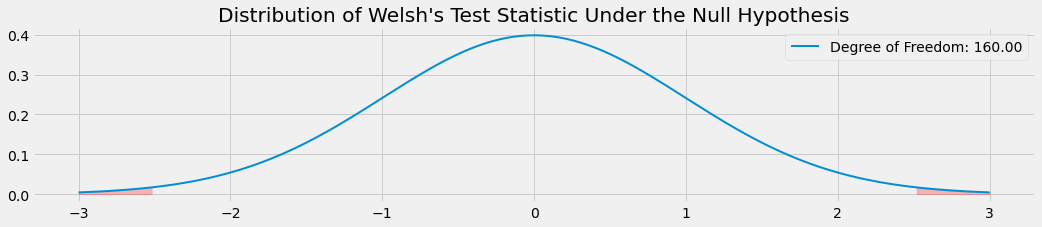

In [255]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis that 
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -astros__obp_ttest[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= astros__obp_ttest[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

print(f"Astro's t-statistic is {astros__obp_ttest[0]}, and p-value is {astros__obp_ttest[1]}")

Astro's t-statistic is -2.4966025468643687, and p-value is 0.013551412067425373


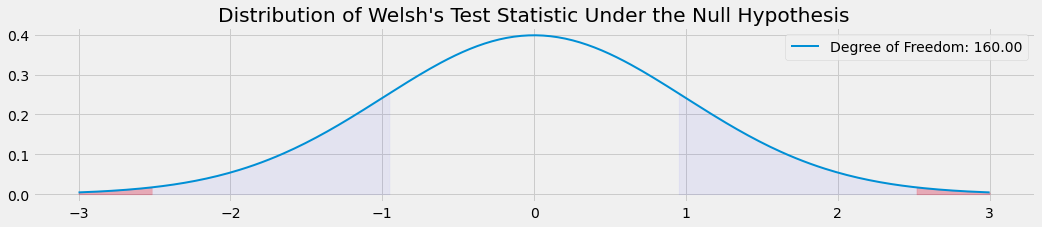

In [258]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
_ = ax.fill_between(x, curve.pdf(x), where=(x >= -astros__obp_ttest[0]), color="red", alpha=0.25)
_ = ax.fill_between(x, curve.pdf(x), where=(x <= astros__obp_ttest[0]), color="red", alpha=0.25)
_ = ax.fill_between(x, curve.pdf(x), where=(x >= .95), color="blue", alpha=0.05)
_ = ax.fill_between(x, curve.pdf(x), where=(x <= -.95), color="blue", alpha=0.05)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

print(f"Astro's t-statistic is {astros__obp_ttest[0]}, and p-value is {astros__obp_ttest[1]}")

In [88]:
#OBP for 2017 season
print(astros2017df.OBP.median())
print(yankees2017df.OBP.median())
print(dodgers2017df.OBP.median())
print(redsox2017df.OBP.median())

0.34600000000000003
0.34
0.341
0.335


In [89]:
#OBP for 2017 home games
print(astros_home_obp.mean())
print(yankees_home_obp.mean())
print(dodgers_home_obp.mean())
print(redsox_home_obp.mean())

0.3400370370370371
0.34225925925925904
0.34209876543209866
0.3364197530864195


In [90]:
#OBP for 2017 away games
print(astros_away_obp.mean())
print(yankees_away_obp.mean())
print(dodgers_away_obp.mean())
print(redsox_away_obp.mean())

0.3463950617283951
0.3403950617283949
0.3397160493827161
0.3374444444444443


In [91]:
#home.get_group(True).OBP.plot.line()

home:0.3400370370370371
away:0.3463950617283951


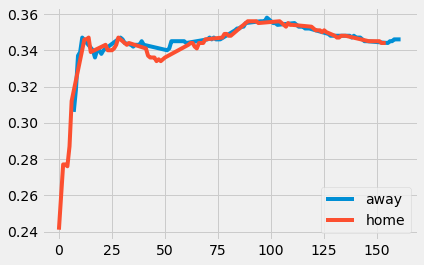

In [92]:
astros_away_obp.plot.line(label="away")
astros_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{astros_home_obp.mean()}')
print(f'away:{astros_away_obp.mean()}')


home:0.34225925925925904
away:0.3403950617283949


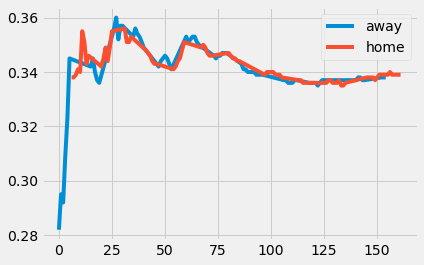

In [93]:
yankees_away_obp.plot.line(label="away")
yankees_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{yankees_home_obp.mean()}')
print(f'away:{yankees_away_obp.mean()}');

home:0.34209876543209866
away:0.3397160493827161


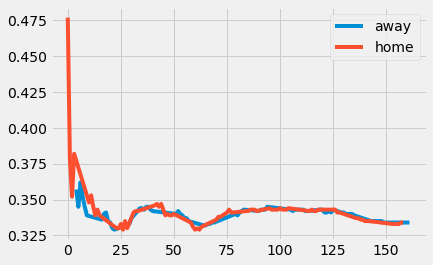

In [94]:
dodgers_away_obp.plot.line(label="away")
dodgers_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{dodgers_home_obp.mean()}')
print(f'away:{dodgers_away_obp.mean()}');

home:0.3364197530864195
away:0.3374444444444443


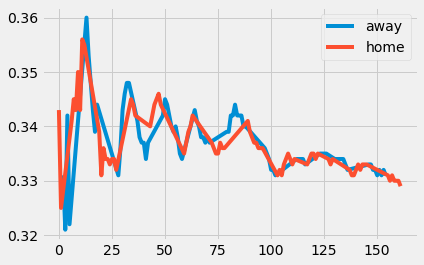

In [95]:
redsox_away_obp.plot.line(label="away")
redsox_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{redsox_home_obp.mean()}')
print(f'away:{redsox_away_obp.mean()}');

#### Is On Base Percentage (OBP) a rolling/weighted average? Can I parce HOME vs AWAY games? Should I consider a different stat like Strikeouts (SO)?

* ## SO advantage
fewer stikeouts/game
expect: astros to have fewer strikeouts than the field

In [97]:
# astros_home_so = astros_home_gb.get_group(True).SO
# astros_away_so = astros_home_gb.get_group(False).SO

In [98]:
# yankees_home_so = yankees_home_gb.get_group(True).SO
# yankees_away_so = yankees_home_gb.get_group(False).SO

In [99]:
# dodgers_home_so = dodgers_home_gb.get_group(True).SO
# dodgers_away_so = dodgers_home_gb.get_group(False).SO

In [100]:
# redsox_home_so = redsox_home_gb.get_group(True).SO
# redsox_away_so = redsox_home_gb.get_group(False).SO

In [101]:
# astros_home_so_desc = astros_home_so.describe()

In [ ]:
#astros_home_so_desc

In [102]:
print(astros_home_so.mean())
# print(yankees_home_so.mean())
# print(dodgers_home_so.mean())
# print(redsox_home_so.mean())

# list_field_home_so = [yankees_home_so.mean(), dodgers_home_so.mean(), redsox_home_so.mean()]
# arr_field_home_so = np.array(list_field_home_so)

# print((astros_home_so.mean() - arr_field_home_so.mean()))

# arr_field_home_so.mean()


6.197530864197531


In [103]:
print(astros_away_so.mean())
# print(yankees_away_so.mean())
# print(dodgers_away_so.mean())
# print(redsox_away_so.mean())

# list_field_away_so = [yankees_away_so.mean(), dodgers_away_so.mean(), redsox_away_so.mean()]
# arr_field_away_so = np.array(list_field_away_so)

# print((astros_home_so.mean() - arr_field_away_so.mean()))

# arr_field_away_so.mean()

7.222222222222222


some plot attempts

In [104]:
# plt.hist(astros_home_so)
# plt.hist(yankees_home_so)
# plt.hist(dodgers_home_so)
# plt.hist(redsox_home_so)
#print(abs(astros_home_so.mean() - yankees_home_so.mean()))
#plt.hist([astros_home_so.mean(), yankees_home_so.mean(), dodgers_home_so.mean(), redsox_home_so.mean()])

In [105]:
# astros_home_so.plot.bar()
# yankees_home_so.plot.bar()
# abs(astros_home_so - yankees_home_so).plot.bar()

* ## SS/AB
new stat: strikeouts/at bats
expect to be lower than the field

In [297]:
astros_home_SoAb = astros_home_gb.get_group(True).SoAb
astros_away_SoAb = astros_home_gb.get_group(False).SoAb

In [298]:
astros2017_home_SoAb = astros2017_home_gb.get_group(True).SoAb
astros2017_away_SoAb = astros2017_home_gb.get_group(False).SoAb
astros2019_home_SoAb = astros2019_home_gb.get_group(True).SoAb
astros2019_home_SoAb = astros2019_home_gb.get_group(False).SoAb

In [299]:
print(astros_home_SoAb.mean())
print(astros_away_SoAb.mean())

0.18812175291296823
0.20336894774961192


In [300]:
# yankees_home_SoAb = yankees_home_gb.get_group(True).SoAb
# yankees_away_SoAb = yankees_home_gb.get_group(False).SoAb

In [301]:
# dodgers_home_SoAb = dodgers_home_gb.get_group(True).SoAb
# dodgers_away_SoAb = dodgers_home_gb.get_group(False).SoAb

In [302]:
# redsox_home_SoAb = redsox_home_gb.get_group(True).SoAb
# redsox_away_SoAb = redsox_home_gb.get_group(False).SoAb

In [303]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.scatter(astros2017df.SoAb, bins = 5,
# #            np.repeat(0, len(astros_home_SoAb)) + \
# #            np.random.normal(0, 0.1, len(astros_home_SoAb)), ## jitter
#            s=45)

# .set_yticks([0, 1])
# ax.set_yticklabels(["Home", "Away"]);

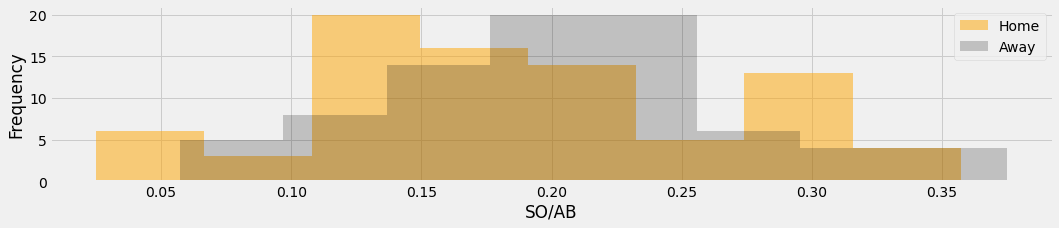

In [304]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros_home_SoAb, bins=8, label="Home", color="orange", alpha=.5)
ax.hist(astros_away_SoAb, bins=8, label="Away", color="black", alpha=.2)

plt.ylabel("Frequency")
plt.xlabel("SO/AB")

ax.legend();

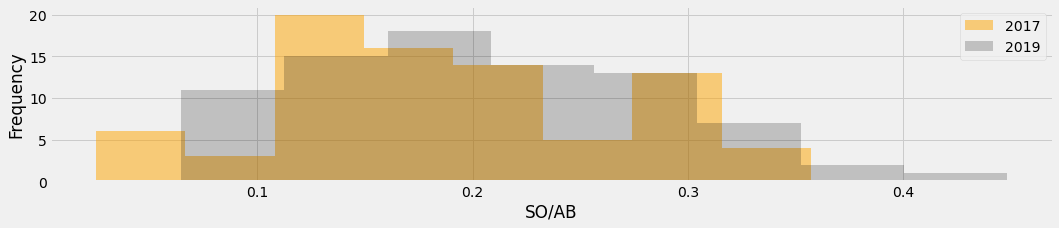

In [311]:
# SS/AB HOME 2017 vs. 2019
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros2017_home_SoAb, bins=8, label="2017", color="orange", alpha=.5)
ax.hist(astros2019_home_SoAb, bins=8, label="2019", color="black", alpha=.2)

plt.ylabel("Frequency")
plt.xlabel("SO/AB")

ax.legend();

In [188]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.hist(yankees_home_SoAb, bins=20, label="Home", color="blue", alpha=.5)
# ax.hist(yankees_away_SoAb, bins=20, label="Away", color="black", alpha=.2)

# plt.ylabel("Games")
# plt.xlabel("SO/AB")

# ax.legend();

In [189]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.hist(dodgers_home_SoAb, bins=20, label="Home", color="purple", alpha=.5)
# ax.hist(dodgers_away_SoAb, bins=20, label="Away", color="black", alpha=.2)

# plt.ylabel("Games")
# plt.xlabel("SO/AB")

# ax.legend();

In [190]:
# # SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1, figsize=(16, 3))

# ax.hist(redsox_home_SoAb, bins=20, label="Home", color="red",alpha=.5)
# ax.hist(redsox_away_SoAb, bins=20, label="Away", color="black", alpha=.2)

# plt.ylabel("Games")
# plt.xlabel("SO/AB")

# ax.legend();

In [191]:
# SS/AB HOME vs. AWAY
# fig, ax = plt.subplots(1,1)

# ax.hist(astros2017df.SoAb)
# ax.hist(astros_home_SoAb, bins=90)
# ax.hist(astros_away_SoAb, alpha=.5, bins=90)
# ax.hist(astros2017df.Date)
# ax.legend(["Home", "Away"]);

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the SS/AB between HOME and AWAY games.

**Alternative:** There is a difference in the SS/AB between HOME and AWAY games.

In [241]:
astros_test_statistic = welch_test_statistic(astros_home_SoAb, astros_away_SoAb)
print("Welch Test Statistic: {:2.2f}".format(astros_test_statistic))
# yankees_test_statistic = welch_test_statistic(yankees_home_SoAb, yankees_away_SoAb)
# print("Welch Test Statistic: {:2.2f}".format(yankees_test_statistic))
# dodgers_test_statistic = welch_test_statistic(dodgers_home_SoAb, dodgers_away_SoAb)
# print("Welch Test Statistic: {:2.2f}".format(dodgers_test_statistic))
# redsox_test_statistic = welch_test_statistic(redsox_home_SoAb, redsox_away_SoAb)
# print("Welch Test Statistic: {:2.2f}".format(redsox_test_statistic))

Welch Test Statistic: -1.29


In [242]:
astros_df = welch_satterhwaithe_df(astros_home_SoAb, astros_away_SoAb)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(astros_df))
# yankees_df = welch_satterhwaithe_df(yankees_home_SoAb, yankees_away_SoAb)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(yankees_df))
# dodgers_df = welch_satterhwaithe_df(dodgers_home_SoAb, dodgers_away_SoAb)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(dodgers_df))
# redsox_df = welch_satterhwaithe_df(redsox_home_SoAb, redsox_away_SoAb)
# print("Degrees of Freedom for Welch's Test: {:2.2f}".format(redsox_df))

Degrees of Freedom for Welch's Test: 156.67


#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the SO/AB between HOME and AWAY games.

**Alternative:** There is a difference in the SO/AB between HOME and AWAY games.

In [315]:
astros_home2017away = stats.ttest_ind(astros_home_SoAb, astros_away_SoAb)

In [319]:
astros_2017home2019 = stats.ttest_ind(astros2017_home_SoAb, astros2019_home_SoAb)

In [316]:
astros[0]

-1.2859019101726619

In [317]:
astros_p_value = astros[1]

In [318]:
astros_ttest

Ttest_indResult(statistic=-1.2859019101726619, pvalue=0.20033515512214123)

Astro's t-statistic is -1.2859019101726619, and p-value is 0.20033515512214123


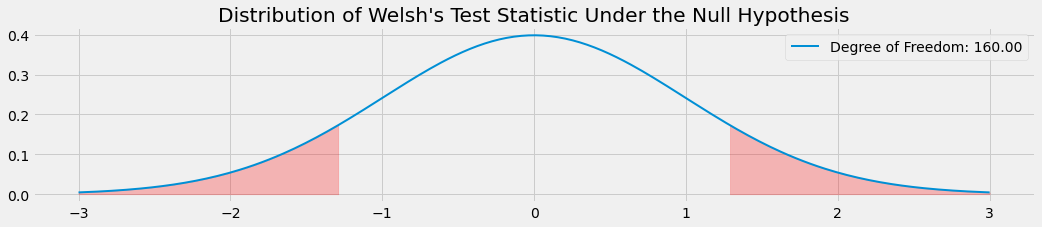

In [240]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
_ = ax.fill_between(x, curve.pdf(x), where=(x >= -astros_home2017away[0]), color="red", alpha=0.25)
_ = ax.fill_between(x, curve.pdf(x), where=(x <= astros_home2017away[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

print(f"Astro's t-statistic is {astros_home2017away[0]}, and p-value is {astros_home2017away[1]}")

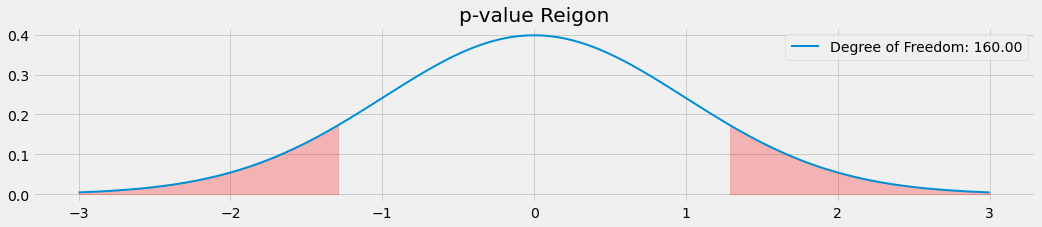

In [210]:
# p-val
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(160) #stats.t_ind()
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -astros[0]), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= astros[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");

In [206]:
astros_p_value = students.cdf(astros_test_statistic) + (1 + students.cdf(astros_test_statistic))
print("p-value for different SS/AB: {:2.2f}".format(astros_p_value))
yankees_p_value = students.cdf(-yankees_test_statistic) + (1 - students.cdf(yankees_test_statistic))
print("p-value for different SS/AB: {:2.2f}".format(yankees_p_value))
dodgers_p_value = students.cdf(-dodgers_test_statistic) + (1 - students.cdf(dodgers_test_statistic))
print("p-value for different SS/AB: {:2.2f}".format(dodgers_p_value))
redsox_p_value = students.cdf(-redsox_test_statistic) + (1 - students.cdf(redsox_test_statistic))
print("p-value for different SS/AB: {:2.2f}".format(redsox_p_value))



p-value for different SS/AB: 1.20
p-value for different SS/AB: 0.52
p-value for different SS/AB: 0.77
p-value for different SS/AB: 1.66


In [211]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [212]:
welch_satterhwaithe_df(astros_home_SoAb, astros_away_SoAb)

156.67247723901176

In [137]:
test_statistic = welch_test_statistic(astros_home_SoAb, astros_away_SoAb)

p_value = 1 - students.cdf(test_statistic)
print("p-value for the OBP for HOME games greater than AWAY games: {:2.3f}".format(p_value))

p-value for the OBP for HOME games greater than AWAY games: 0.901


In [138]:
print(astros_home_SoAb.mean())
print(yankees_home_SoAb.mean())
print(dodgers_home_SoAb.mean())
print(redsox_home_SoAb.mean())

list_field_home_soab = [yankees_home_SoAb.mean(), dodgers_home_SoAb.mean(), redsox_home_SoAb.mean()]
arr_field_home_soab = np.array(list_field_home_soab)

print((astros_home_SoAb.mean() - arr_field_home_soab.mean()))

arr_field_home_soab.mean()

0.18812175291296823
0.2538940449109881
0.2585494086765249
0.21108347759305549
-0.05305389081388795


0.24117564372685618

In [139]:
print(astros_away_SoAb.mean())
print(yankees_away_SoAb.mean())
print(dodgers_away_SoAb.mean())
print(redsox_away_SoAb.mean())

list_field_away_soab = [yankees_away_SoAb.mean(), dodgers_away_SoAb.mean(), redsox_away_SoAb.mean()]
arr_field_away_soab = np.array(list_field_away_soab)

print((astros_away_SoAb.mean() - arr_field_away_soab.mean()))

arr_field_home_soab.mean()

0.20336894774961192
0.24466594275864456
0.25466970932233124
0.22296091479164296
-0.037396574541260996


0.24117564372685618

* ## BB/AB
EXPECT: astros to be higher than the field

In [140]:
astros_home_BbAb = astros_home_gb.get_group(True).BbAb
astros_away_BbAb = astros_home_gb.get_group(False).BbAb

In [141]:
yankees_home_BbAb = yankees_home_gb.get_group(True).BbAb
yankees_away_BbAb = yankees_home_gb.get_group(False).BbAb

In [142]:
dodgers_home_BbAb = dodgers_home_gb.get_group(True).BbAb
dodgers_away_BbAb = dodgers_home_gb.get_group(False).BbAb

In [143]:
redsox_home_BbAb = redsox_home_gb.get_group(True).BbAb
redsox_away_BbAb = redsox_home_gb.get_group(False).BbAb

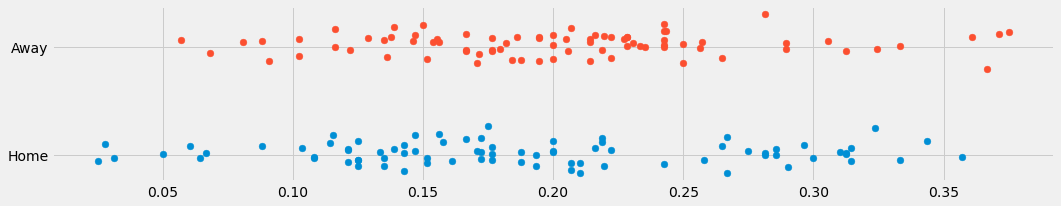

In [144]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(astros_home_SoAb, 
           np.repeat(0, len(astros_home_BbAb)) + \
           np.random.normal(0, 0.1, len(astros_home_BbAb)), ## jitter
           s=45)
ax.scatter(astros_away_SoAb, 
           np.repeat(1, len(astros_away_BbAb)) + \
           np.random.normal(0, 0.1, len(astros_away_BbAb)), 
           s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Home", "Away"]);

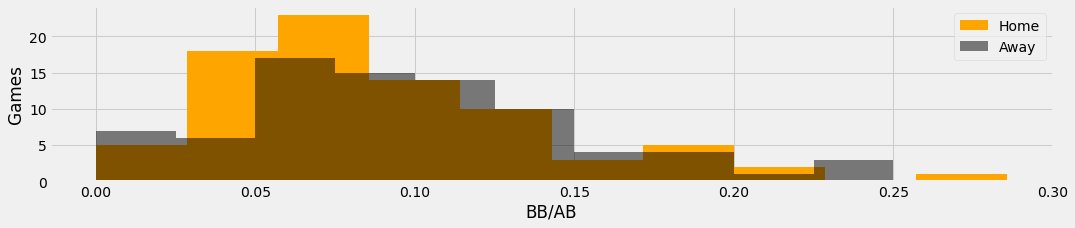

In [146]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros_home_BbAb, bins=10, label="Home", color="orange")
ax.hist(astros_away_BbAb, bins=10, label="Away", color="black", alpha=.5)

plt.ylabel("Games")
plt.xlabel("BB/AB")

ax.legend();

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the SS/AB between HOME and AWAY games.

**Alternative:** There is a difference in the SS/AB between HOME and AWAY games.

#### Create a Probablistic Model of the Situation Assuming the Null Hypothesis is True

Our question concerns population averages (is Matt's population average different than Nick's).  Our measurements are **sample averages**, which, from the central limit theorem, we know are approximately normally distributed given the population average

$$ \text{Sample average of Matt's kickflips} \sim N \biggl( \mu_M, \sqrt{\frac{\sigma^2_M}{25}} \biggr) $$
$$ \text{Sample average of Nick's kickflips} \sim N \biggl( \mu_N, \sqrt{\frac{\sigma^2_N}{25}} \biggr) $$

If we are willing to assume that the height of Matt's individual kickflips are **independent** from Nick's, then we can compress the important information into one normal distribution

$$ \text{Difference in sample averages} \sim N \biggl( \mu_M - \mu_N, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \biggr) $$

Under the assumption of the null hypothesis

$$ \text{Difference in sample averages} \sim N \biggl( 0, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \biggr) $$

In [147]:
print(astros_home_BbAb.mean())
print(yankees_home_BbAb.mean())
print(dodgers_home_BbAb.mean())
print(redsox_home_BbAb.mean())

list_field_home_bbab = [yankees_home_BbAb.mean(), dodgers_home_BbAb.mean(), redsox_home_BbAb.mean()]
arr_field_home_bbab = np.array(list_field_home_bbab)

print((astros_home_SoAb.mean() - arr_field_home_soab.mean()))

arr_field_home_bbab.mean()

0.08566245119553516
0.1162341190267757
0.11739305753859244
0.10293266258842577
-0.05305389081388795


0.11218661305126464

In [148]:
print(astros_away_BbAb.mean())
print(yankees_away_BbAb.mean())
print(dodgers_away_BbAb.mean())
print(redsox_away_BbAb.mean())

list_field_away_bbab = [yankees_away_BbAb.mean(), dodgers_away_BbAb.mean(), redsox_away_BbAb.mean()]
arr_field_away_bbab = np.array(list_field_away_bbab)

print((astros_away_BbAb.mean() - arr_field_away_bbab.mean()))

arr_field_away_bbab.mean()

0.09646287836801411
0.10544476198569479
0.12342118055527636
0.09995945547206697
-0.013145587636331932


0.10960846600434604

* Baseball Reference uses MEDIAN over MEAN for all of its averages. Would using MEAN over MEDIAN effect outlieres that may be important for my test?
** it would because some games had unusually (exciting) scores. 

In [149]:
astros2017df.head()

,Gtm,Date,Home,Opp,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc),GmeSc,SoAb,BbAb
0,1.0,Apr 3,True,SEA,"W,3-0",30.0,27.0,3.0,6.0,0.0,0.0,2.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.222,0.241,0.444,0.686,3.0,10.0,R,F.Hernandez(55),55,0.222222,0.037037
1,2.0,Apr 4,True,SEA,"W,2-1",29.0,26.0,2.0,5.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.208,0.259,0.434,0.693,3.0,10.0,R,H.Iwakuma(55),55,0.115385,0.115385
2,3.0,Apr 5,True,SEA,"W,5-3",55.0,51.0,5.0,13.0,4.0,0.0,1.0,5.0,3.0,0.0,9.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.231,0.277,0.413,0.690,12.0,11.0,L,J.Paxton(72),72,0.176471,0.058824
3,4.0,Apr 6,True,SEA,"L,2-4",36.0,32.0,2.0,6.0,0.0,0.0,2.0,2.0,3.0,1.0,10.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.221,0.277,0.404,0.681,7.0,11.0,L,A.Miranda(50),50,0.312500,0.093750
4,5.0,Apr 7,True,KCR,"L,1-5",33.0,30.0,1.0,6.0,1.0,0.0,0.0,1.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.217,0.276,0.373,0.650,5.0,10.0,L,J.Vargas(61),61,0.266667,0.100000


In [150]:
astros2017df['GmeSc'].unique()

array(['55', '72', '50', '61', '54', '75', '42', '35', '51', '62', '60',
       '52', '68', '44', '48', '45', '28', '76', '43', '21', '24', '56',
       '46', '32', '11', '67', '12', '79', '53', '34', '20', '65', '33',
       '31', '40', '69', '29', '26', '39', '(3', '49', '47', '15', '37',
       '64', '27', '25', '73', '(7', '23', '71', '74', '82', '57', '38',
       '78', '59', '22', '63', '58'], dtype=object)

In [151]:
astros2017df['GmeSc'].head(20)

0     55
1     55
2     72
3     50
4     61
5     54
6     54
7     75
8     42
9     35
10    51
11    62
12    60
13    51
14    52
15    68
16    44
17    48
18    45
19    50
Name: GmeSc, dtype: object